In [2]:
import pandas as pd

metadata = pd.read_csv("../dataset/metadata.csv")

metadata

,image_path,mask_path,label
0,benign/benign (1).png,benign/benign (1)_mask.png,Benign
1,benign/benign (10).png,benign/benign (10)_mask.png,Benign
2,benign/benign (100).png,benign/benign (100)_mask.png,Benign
3,benign/benign (101).png,benign/benign (101)_mask.png,Benign
4,benign/benign (102).png,benign/benign (102)_mask.png,Benign
...,...,...,...
775,normal/normal (95).png,normal/normal (95)_mask.png,Normal
776,normal/normal (96).png,normal/normal (96)_mask.png,Normal
777,normal/normal (97).png,normal/normal (97)_mask.png,Normal
778,normal/normal (98).png,normal/normal (98)_mask.png,Normal


In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
IMG_SIZE = (224, 224)

In [5]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [6]:
def preprocess_image(img_path):
    """Loads an image, applies CLAHE, resizes it, normalizes it, and converts it to 3-channel RGB."""
    if not os.path.exists(img_path):
        print(f"Warning: Image not found - {img_path}")
        return None
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = clahe.apply(img)
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0
    img = np.stack([img] * 3, axis=-1)
    
    return img

In [7]:
def preprocess_mask(mask_path):
    """Loads a mask image, resizes it, and ensures binary format (0 or 1)."""
    if not os.path.exists(mask_path):
        print(f"Warning: Mask not found - {mask_path}")
        return None
    
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, IMG_SIZE)
    mask = mask / 255.0
    mask = np.where(mask > 0.5, 1, 0).astype(np.uint8)
    
    return mask

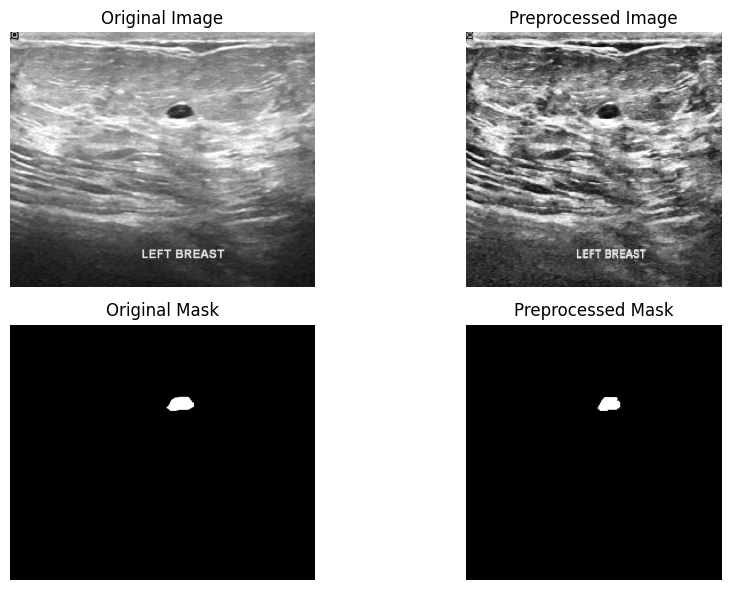

In [8]:
num_samples = 1

for i in range(num_samples):
    img_rel_path = metadata.iloc[i]['image_path']
    mask_rel_path = metadata.iloc[i]['mask_path']
    
    base_img = os.path.splitext(os.path.basename(img_rel_path))[0]
    base_mask = os.path.splitext(os.path.basename(mask_rel_path))[0]
    expected_mask = base_img + "_mask"

    
    full_img_path = os.path.join("../dataset", img_rel_path)
    full_mask_path = os.path.join("../dataset", mask_rel_path)
    
    original_img = cv2.imread(full_img_path, cv2.IMREAD_GRAYSCALE)
    original_mask = cv2.imread(full_mask_path, cv2.IMREAD_GRAYSCALE)
    
    preprocessed_img = preprocess_image(full_img_path)
    preprocessed_mask = preprocess_mask(full_mask_path)
    
    if original_img is not None and preprocessed_img is not None and original_mask is not None and preprocessed_mask is not None:
        plt.figure(figsize=(10, 6))
        
        plt.subplot(2, 2, 1)
        plt.imshow(original_img, cmap='gray')
        plt.title("Original Image")
        plt.axis('off')
        
        plt.subplot(2, 2, 2)
        plt.imshow(preprocessed_img, cmap='gray')
        plt.title("Preprocessed Image")
        plt.axis('off')
        
        plt.subplot(2, 2, 3)
        plt.imshow(original_mask, cmap='gray')
        plt.title("Original Mask")
        plt.axis('off')
        
        plt.subplot(2, 2, 4)
        plt.imshow(preprocessed_mask, cmap='gray')
        plt.title("Preprocessed Mask")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

In [9]:
processed_images_dir = "../processed-dataset/"
processed_masks_dir = "../processed-dataset/"
dataset_dir = "../dataset"

categories = ["benign", "normal", "malignant"]
for category in categories:
    os.makedirs(os.path.join(processed_images_dir, category), exist_ok=True)
    os.makedirs(os.path.join(processed_masks_dir, category), exist_ok=True)

In [10]:
for idx, row in metadata.iterrows():
    rel_img_path = row['image_path']
    rel_mask_path = row['mask_path']
    category = rel_img_path.split(os.sep)[0]
    
    full_img_path = os.path.join(dataset_dir, rel_img_path)
    base_name, ext = os.path.splitext(os.path.basename(rel_img_path))
    expected_mask_filename = base_name + "_mask" + ext
    full_mask_path = os.path.join(dataset_dir, category, expected_mask_filename)
    
    processed_img = preprocess_image(full_img_path)
    processed_mask = preprocess_mask(full_mask_path)
    
    if processed_img is not None and processed_mask is not None:
        out_img_path = os.path.join(processed_images_dir, category, os.path.basename(rel_img_path))
        out_mask_path = os.path.join(processed_masks_dir, category, expected_mask_filename)
        
        img_to_save = (processed_img * 255).astype(np.uint8)
        mask_to_save = (processed_mask * 255).astype(np.uint8)
        img_to_save_bgr = cv2.cvtColor(img_to_save, cv2.COLOR_RGB2BGR)
        
        cv2.imwrite(out_img_path, img_to_save_bgr)
        cv2.imwrite(out_mask_path, mask_to_save)
        print(f"Processed and saved: {rel_img_path} and {expected_mask_filename}")

print("All processed images and masks have been saved!")

Processed and saved: benign/benign (1).png and benign (1)_mask.png
Processed and saved: benign/benign (10).png and benign (10)_mask.png
Processed and saved: benign/benign (100).png and benign (100)_mask.png
Processed and saved: benign/benign (101).png and benign (101)_mask.png
Processed and saved: benign/benign (102).png and benign (102)_mask.png
Processed and saved: benign/benign (103).png and benign (103)_mask.png
Processed and saved: benign/benign (104).png and benign (104)_mask.png
Processed and saved: benign/benign (105).png and benign (105)_mask.png
Processed and saved: benign/benign (106).png and benign (106)_mask.png
Processed and saved: benign/benign (107).png and benign (107)_mask.png
Processed and saved: benign/benign (108).png and benign (108)_mask.png
Processed and saved: benign/benign (109).png and benign (109)_mask.png
Processed and saved: benign/benign (11).png and benign (11)_mask.png
Processed and saved: benign/benign (110).png and benign (110)_mask.png
Processed and 

Processed and saved: benign/benign (205).png and benign (205)_mask.png
Processed and saved: benign/benign (206).png and benign (206)_mask.png
Processed and saved: benign/benign (207).png and benign (207)_mask.png
Processed and saved: benign/benign (208).png and benign (208)_mask.png
Processed and saved: benign/benign (209).png and benign (209)_mask.png
Processed and saved: benign/benign (21).png and benign (21)_mask.png
Processed and saved: benign/benign (210).png and benign (210)_mask.png
Processed and saved: benign/benign (211).png and benign (211)_mask.png
Processed and saved: benign/benign (212).png and benign (212)_mask.png
Processed and saved: benign/benign (213).png and benign (213)_mask.png
Processed and saved: benign/benign (214).png and benign (214)_mask.png
Processed and saved: benign/benign (215).png and benign (215)_mask.png
Processed and saved: benign/benign (216).png and benign (216)_mask.png
Processed and saved: benign/benign (217).png and benign (217)_mask.png
Processe

Processed and saved: benign/benign (335).png and benign (335)_mask.png
Processed and saved: benign/benign (336).png and benign (336)_mask.png
Processed and saved: benign/benign (337).png and benign (337)_mask.png
Processed and saved: benign/benign (338).png and benign (338)_mask.png
Processed and saved: benign/benign (339).png and benign (339)_mask.png
Processed and saved: benign/benign (34).png and benign (34)_mask.png
Processed and saved: benign/benign (340).png and benign (340)_mask.png
Processed and saved: benign/benign (341).png and benign (341)_mask.png
Processed and saved: benign/benign (342).png and benign (342)_mask.png
Processed and saved: benign/benign (343).png and benign (343)_mask.png
Processed and saved: benign/benign (344).png and benign (344)_mask.png
Processed and saved: benign/benign (345).png and benign (345)_mask.png
Processed and saved: benign/benign (346).png and benign (346)_mask.png
Processed and saved: benign/benign (347).png and benign (347)_mask.png
Processe

Processed and saved: benign/benign (56).png and benign (56)_mask.png
Processed and saved: benign/benign (57).png and benign (57)_mask.png
Processed and saved: benign/benign (58).png and benign (58)_mask.png
Processed and saved: benign/benign (59).png and benign (59)_mask.png
Processed and saved: benign/benign (6).png and benign (6)_mask.png
Processed and saved: benign/benign (60).png and benign (60)_mask.png
Processed and saved: benign/benign (61).png and benign (61)_mask.png
Processed and saved: benign/benign (62).png and benign (62)_mask.png
Processed and saved: benign/benign (63).png and benign (63)_mask.png
Processed and saved: benign/benign (64).png and benign (64)_mask.png
Processed and saved: benign/benign (65).png and benign (65)_mask.png
Processed and saved: benign/benign (66).png and benign (66)_mask.png
Processed and saved: benign/benign (67).png and benign (67)_mask.png
Processed and saved: benign/benign (68).png and benign (68)_mask.png
Processed and saved: benign/benign (

Processed and saved: malignant/malignant (175).png and malignant (175)_mask.png
Processed and saved: malignant/malignant (176).png and malignant (176)_mask.png
Processed and saved: malignant/malignant (177).png and malignant (177)_mask.png
Processed and saved: malignant/malignant (178).png and malignant (178)_mask.png
Processed and saved: malignant/malignant (179).png and malignant (179)_mask.png
Processed and saved: malignant/malignant (18).png and malignant (18)_mask.png
Processed and saved: malignant/malignant (180).png and malignant (180)_mask.png
Processed and saved: malignant/malignant (181).png and malignant (181)_mask.png
Processed and saved: malignant/malignant (182).png and malignant (182)_mask.png
Processed and saved: malignant/malignant (183).png and malignant (183)_mask.png
Processed and saved: malignant/malignant (184).png and malignant (184)_mask.png
Processed and saved: malignant/malignant (185).png and malignant (185)_mask.png
Processed and saved: malignant/malignant (

Processed and saved: normal/normal (100).png and normal (100)_mask.png
Processed and saved: normal/normal (101).png and normal (101)_mask.png
Processed and saved: normal/normal (102).png and normal (102)_mask.png
Processed and saved: normal/normal (103).png and normal (103)_mask.png
Processed and saved: normal/normal (104).png and normal (104)_mask.png
Processed and saved: normal/normal (105).png and normal (105)_mask.png
Processed and saved: normal/normal (106).png and normal (106)_mask.png
Processed and saved: normal/normal (107).png and normal (107)_mask.png
Processed and saved: normal/normal (108).png and normal (108)_mask.png
Processed and saved: normal/normal (109).png and normal (109)_mask.png
Processed and saved: normal/normal (11).png and normal (11)_mask.png
Processed and saved: normal/normal (110).png and normal (110)_mask.png
Processed and saved: normal/normal (111).png and normal (111)_mask.png
Processed and saved: normal/normal (112).png and normal (112)_mask.png
Processe

Processed and saved: normal/normal (9).png and normal (9)_mask.png
Processed and saved: normal/normal (90).png and normal (90)_mask.png
Processed and saved: normal/normal (91).png and normal (91)_mask.png
Processed and saved: normal/normal (92).png and normal (92)_mask.png
Processed and saved: normal/normal (93).png and normal (93)_mask.png
Processed and saved: normal/normal (94).png and normal (94)_mask.png
Processed and saved: normal/normal (95).png and normal (95)_mask.png
Processed and saved: normal/normal (96).png and normal (96)_mask.png
Processed and saved: normal/normal (97).png and normal (97)_mask.png
Processed and saved: normal/normal (98).png and normal (98)_mask.png
Processed and saved: normal/normal (99).png and normal (99)_mask.png
All processed images and masks have been saved!


In [11]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(metadata, test_size=0.3, stratify=metadata['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

metadata.loc[train_df.index, 'split'] = 'train'
metadata.loc[val_df.index, 'split'] = 'val'
metadata.loc[test_df.index, 'split'] = 'test'

metadata.to_csv("../processed-dataset/metadata_split.csv", index=False)
print("Dataset split completed and saved to metadata_split.csv!")

Dataset split completed and saved to metadata_split.csv!


In [12]:
metadata

,image_path,mask_path,label,split
0,benign/benign (1).png,benign/benign (1)_mask.png,Benign,train
1,benign/benign (10).png,benign/benign (10)_mask.png,Benign,val
2,benign/benign (100).png,benign/benign (100)_mask.png,Benign,train
3,benign/benign (101).png,benign/benign (101)_mask.png,Benign,train
4,benign/benign (102).png,benign/benign (102)_mask.png,Benign,val
...,...,...,...,...
775,normal/normal (95).png,normal/normal (95)_mask.png,Normal,train
776,normal/normal (96).png,normal/normal (96)_mask.png,Normal,train
777,normal/normal (97).png,normal/normal (97)_mask.png,Normal,train
778,normal/normal (98).png,normal/normal (98)_mask.png,Normal,train


In [15]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def ensure_directory_exists(directory):
    """Ensure that the directory exists; if not, create it."""
    if not os.path.exists(directory):
        os.makedirs(directory)

# Initialize ImageDataGenerator with various augmentation techniques
augmented_img_gen = ImageDataGenerator(
    rotation_range=30,      # Rotate images by up to 30 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20%
    height_shift_range=0.2, # Shift images vertically by up to 20%
    shear_range=0.2,        # Shear transformations
    zoom_range=0.2,         # Zoom in/out by up to 20%
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill missing pixels after transformation
)

augmented_mask_gen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augment_data(img, mask):
    """Apply the same transformation to both image and mask."""
    # Ensure the image and mask are in the format (1, 224, 224, 3)
    img = np.expand_dims(img, axis=0)  # (1, 224, 224)
    mask = np.expand_dims(mask, axis=0)  # (1, 224, 224)
    
    # If the image is grayscale (single channel), expand it to 3 channels (RGB)
    if img.shape[-1] == 1:
        img = np.repeat(img, 3, axis=-1)  # (1, 224, 224, 3)

    # Ensure the mask is in a format compatible with augmentation (binary)
    mask = np.expand_dims(mask, axis=-1)  # (1, 224, 224, 1) - mask should have single channel

    # Augment image and mask
    img_gen = augmented_img_gen.flow(img, batch_size=1)
    mask_gen = augmented_mask_gen.flow(mask, batch_size=1)
    
    # Use next() to get the next batch
    augmented_images = next(img_gen)
    augmented_masks = next(mask_gen)
    
    return augmented_images[0], augmented_masks[0]


# Target number of augmented images and masks per class
target_samples_per_class = 1000

categories = ["benign", "normal", "malignant"]
processed_images_dir = "../aug-processed-dataset/"
processed_masks_dir = "../aug-processed-dataset/"
dataset_dir = "../dataset"

# CSV file to store the details of augmented images and masks
csv_file_path = "../augmented_images_details.csv"
csv_columns = ['image_path', 'mask_path', 'category']

# Create or append to the CSV file
if not os.path.exists(csv_file_path):
    with open(csv_file_path, mode='w') as file:
        file.write(','.join(csv_columns) + '\n')
image_counter = 0
mask_counter = 0
for category in categories:
    # Ensure the category folder exists
    category_processed_images_dir = os.path.join(processed_images_dir, category)
    category_processed_masks_dir = os.path.join(processed_masks_dir, category)
    
    # Ensure these directories exist
    ensure_directory_exists(category_processed_images_dir)
    ensure_directory_exists(category_processed_masks_dir)
    
    # Get all images and masks for the current category
    category_image_paths = metadata[metadata['split'] == 'train'][metadata['image_path'].str.startswith(category)]['image_path'].tolist()
    category_mask_paths = metadata[metadata['split'] == 'train'][metadata['mask_path'].str.startswith(category)]['mask_path'].tolist()
    
    current_count = len(category_image_paths)  # Number of images already in the category
    required_count = target_samples_per_class - current_count  # How many more augmented images we need

    print(f"Category '{category}' has {current_count} images. Need {required_count} more.")

    # Get current filenames count in the processed directories to start from the next number
    existing_images = os.listdir(category_processed_images_dir)
    existing_masks = os.listdir(category_processed_masks_dir)
    
    # Start the counter from the maximum index in the existing files (if any)
    image_counter = len(existing_images)
    mask_counter = len(existing_masks)

    # Augment data until we reach the target count
    while required_count > 0:
        for img_path, mask_path in zip(category_image_paths, category_mask_paths):
            if required_count <= 0:
                break

            full_img_path = os.path.join(dataset_dir, img_path)
            full_mask_path = os.path.join(dataset_dir, mask_path)
            
            processed_img = preprocess_image(full_img_path)
            processed_mask = preprocess_mask(full_mask_path)
            
            if processed_img is not None and processed_mask is not None:
                # Augment the image and mask
                augmented_img, augmented_mask = augment_data(processed_img, processed_mask)
                
                # Increment counters for each augmented file
                image_counter += 1
                mask_counter += 1
                
                # Save the augmented image and mask with a numbered filename
                augmented_img_path = os.path.join(category_processed_images_dir, f"aug_{image_counter}.jpg")
                augmented_mask_path = os.path.join(category_processed_masks_dir, f"aug_{mask_counter}_mask.png")
                
                augmented_img_to_save = (augmented_img * 255).astype(np.uint8)
                augmented_mask_to_save = (augmented_mask * 255).astype(np.uint8)
                augmented_img_to_save_bgr = cv2.cvtColor(augmented_img_to_save, cv2.COLOR_RGB2BGR)
                
                # Save the augmented image and mask to the respective directories
                cv2.imwrite(augmented_img_path, augmented_img_to_save_bgr)
                cv2.imwrite(augmented_mask_path, augmented_mask_to_save)
                
                # Log the details into the CSV file
                with open(csv_file_path, mode='a') as file:
                    file.write(f"{augmented_img_path},{augmented_mask_path},{category}\n")
                
                required_count -= 1
                print(f"Augmented and saved: {augmented_img_path} and {augmented_mask_path}")
    
    print(f"Category '{category}' now has {target_samples_per_class} images and {target_samples_per_class} masks.")


/var/folders/tt/h58zm7ld5jx4b9zpy0bhrg9w0000gn/T/ipykernel_3428/3258575719.py:85: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_image_paths = metadata[metadata['split'] == 'train'][metadata['image_path'].str.startswith(category)]['image_path'].tolist()
/var/folders/tt/h58zm7ld5jx4b9zpy0bhrg9w0000gn/T/ipykernel_3428/3258575719.py:86: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_mask_paths = metadata[metadata['split'] == 'train'][metadata['mask_path'].str.startswith(category)]['mask_path'].tolist()


Category 'benign' has 306 images. Need 694 more.
Augmented and saved: ../aug-processed-dataset/benign/aug_1.jpg and ../aug-processed-dataset/benign/aug_1_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_2.jpg and ../aug-processed-dataset/benign/aug_2_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_3.jpg and ../aug-processed-dataset/benign/aug_3_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_4.jpg and ../aug-processed-dataset/benign/aug_4_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_5.jpg and ../aug-processed-dataset/benign/aug_5_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_6.jpg and ../aug-processed-dataset/benign/aug_6_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_7.jpg and ../aug-processed-dataset/benign/aug_7_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_8.jpg and ../aug-processed-dataset/benign/aug_8_mask.png
Augmented and saved: ../aug-processed-d

Augmented and saved: ../aug-processed-dataset/benign/aug_75.jpg and ../aug-processed-dataset/benign/aug_75_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_76.jpg and ../aug-processed-dataset/benign/aug_76_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_77.jpg and ../aug-processed-dataset/benign/aug_77_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_78.jpg and ../aug-processed-dataset/benign/aug_78_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_79.jpg and ../aug-processed-dataset/benign/aug_79_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_80.jpg and ../aug-processed-dataset/benign/aug_80_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_81.jpg and ../aug-processed-dataset/benign/aug_81_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_82.jpg and ../aug-processed-dataset/benign/aug_82_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_83.jpg and ../a

Augmented and saved: ../aug-processed-dataset/benign/aug_166.jpg and ../aug-processed-dataset/benign/aug_166_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_167.jpg and ../aug-processed-dataset/benign/aug_167_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_168.jpg and ../aug-processed-dataset/benign/aug_168_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_169.jpg and ../aug-processed-dataset/benign/aug_169_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_170.jpg and ../aug-processed-dataset/benign/aug_170_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_171.jpg and ../aug-processed-dataset/benign/aug_171_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_172.jpg and ../aug-processed-dataset/benign/aug_172_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_173.jpg and ../aug-processed-dataset/benign/aug_173_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug

Augmented and saved: ../aug-processed-dataset/benign/aug_250.jpg and ../aug-processed-dataset/benign/aug_250_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_251.jpg and ../aug-processed-dataset/benign/aug_251_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_252.jpg and ../aug-processed-dataset/benign/aug_252_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_253.jpg and ../aug-processed-dataset/benign/aug_253_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_254.jpg and ../aug-processed-dataset/benign/aug_254_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_255.jpg and ../aug-processed-dataset/benign/aug_255_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_256.jpg and ../aug-processed-dataset/benign/aug_256_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_257.jpg and ../aug-processed-dataset/benign/aug_257_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug

Augmented and saved: ../aug-processed-dataset/benign/aug_330.jpg and ../aug-processed-dataset/benign/aug_330_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_331.jpg and ../aug-processed-dataset/benign/aug_331_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_332.jpg and ../aug-processed-dataset/benign/aug_332_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_333.jpg and ../aug-processed-dataset/benign/aug_333_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_334.jpg and ../aug-processed-dataset/benign/aug_334_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_335.jpg and ../aug-processed-dataset/benign/aug_335_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_336.jpg and ../aug-processed-dataset/benign/aug_336_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_337.jpg and ../aug-processed-dataset/benign/aug_337_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug

Augmented and saved: ../aug-processed-dataset/benign/aug_415.jpg and ../aug-processed-dataset/benign/aug_415_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_416.jpg and ../aug-processed-dataset/benign/aug_416_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_417.jpg and ../aug-processed-dataset/benign/aug_417_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_418.jpg and ../aug-processed-dataset/benign/aug_418_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_419.jpg and ../aug-processed-dataset/benign/aug_419_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_420.jpg and ../aug-processed-dataset/benign/aug_420_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_421.jpg and ../aug-processed-dataset/benign/aug_421_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_422.jpg and ../aug-processed-dataset/benign/aug_422_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug

Augmented and saved: ../aug-processed-dataset/benign/aug_485.jpg and ../aug-processed-dataset/benign/aug_485_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_486.jpg and ../aug-processed-dataset/benign/aug_486_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_487.jpg and ../aug-processed-dataset/benign/aug_487_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_488.jpg and ../aug-processed-dataset/benign/aug_488_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_489.jpg and ../aug-processed-dataset/benign/aug_489_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_490.jpg and ../aug-processed-dataset/benign/aug_490_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_491.jpg and ../aug-processed-dataset/benign/aug_491_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_492.jpg and ../aug-processed-dataset/benign/aug_492_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug

Augmented and saved: ../aug-processed-dataset/benign/aug_569.jpg and ../aug-processed-dataset/benign/aug_569_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_570.jpg and ../aug-processed-dataset/benign/aug_570_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_571.jpg and ../aug-processed-dataset/benign/aug_571_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_572.jpg and ../aug-processed-dataset/benign/aug_572_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_573.jpg and ../aug-processed-dataset/benign/aug_573_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_574.jpg and ../aug-processed-dataset/benign/aug_574_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_575.jpg and ../aug-processed-dataset/benign/aug_575_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_576.jpg and ../aug-processed-dataset/benign/aug_576_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug

Augmented and saved: ../aug-processed-dataset/benign/aug_649.jpg and ../aug-processed-dataset/benign/aug_649_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_650.jpg and ../aug-processed-dataset/benign/aug_650_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_651.jpg and ../aug-processed-dataset/benign/aug_651_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_652.jpg and ../aug-processed-dataset/benign/aug_652_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_653.jpg and ../aug-processed-dataset/benign/aug_653_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_654.jpg and ../aug-processed-dataset/benign/aug_654_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_655.jpg and ../aug-processed-dataset/benign/aug_655_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug_656.jpg and ../aug-processed-dataset/benign/aug_656_mask.png
Augmented and saved: ../aug-processed-dataset/benign/aug

/var/folders/tt/h58zm7ld5jx4b9zpy0bhrg9w0000gn/T/ipykernel_3428/3258575719.py:85: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_image_paths = metadata[metadata['split'] == 'train'][metadata['image_path'].str.startswith(category)]['image_path'].tolist()
/var/folders/tt/h58zm7ld5jx4b9zpy0bhrg9w0000gn/T/ipykernel_3428/3258575719.py:86: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_mask_paths = metadata[metadata['split'] == 'train'][metadata['mask_path'].str.startswith(category)]['mask_path'].tolist()


Augmented and saved: ../aug-processed-dataset/normal/aug_14.jpg and ../aug-processed-dataset/normal/aug_14_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_15.jpg and ../aug-processed-dataset/normal/aug_15_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_16.jpg and ../aug-processed-dataset/normal/aug_16_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_17.jpg and ../aug-processed-dataset/normal/aug_17_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_18.jpg and ../aug-processed-dataset/normal/aug_18_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_19.jpg and ../aug-processed-dataset/normal/aug_19_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_20.jpg and ../aug-processed-dataset/normal/aug_20_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_21.jpg and ../aug-processed-dataset/normal/aug_21_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_22.jpg and ../a

Augmented and saved: ../aug-processed-dataset/normal/aug_102.jpg and ../aug-processed-dataset/normal/aug_102_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_103.jpg and ../aug-processed-dataset/normal/aug_103_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_104.jpg and ../aug-processed-dataset/normal/aug_104_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_105.jpg and ../aug-processed-dataset/normal/aug_105_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_106.jpg and ../aug-processed-dataset/normal/aug_106_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_107.jpg and ../aug-processed-dataset/normal/aug_107_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_108.jpg and ../aug-processed-dataset/normal/aug_108_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_109.jpg and ../aug-processed-dataset/normal/aug_109_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug

Augmented and saved: ../aug-processed-dataset/normal/aug_190.jpg and ../aug-processed-dataset/normal/aug_190_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_191.jpg and ../aug-processed-dataset/normal/aug_191_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_192.jpg and ../aug-processed-dataset/normal/aug_192_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_193.jpg and ../aug-processed-dataset/normal/aug_193_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_194.jpg and ../aug-processed-dataset/normal/aug_194_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_195.jpg and ../aug-processed-dataset/normal/aug_195_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_196.jpg and ../aug-processed-dataset/normal/aug_196_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_197.jpg and ../aug-processed-dataset/normal/aug_197_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug

Augmented and saved: ../aug-processed-dataset/normal/aug_277.jpg and ../aug-processed-dataset/normal/aug_277_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_278.jpg and ../aug-processed-dataset/normal/aug_278_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_279.jpg and ../aug-processed-dataset/normal/aug_279_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_280.jpg and ../aug-processed-dataset/normal/aug_280_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_281.jpg and ../aug-processed-dataset/normal/aug_281_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_282.jpg and ../aug-processed-dataset/normal/aug_282_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_283.jpg and ../aug-processed-dataset/normal/aug_283_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_284.jpg and ../aug-processed-dataset/normal/aug_284_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug

Augmented and saved: ../aug-processed-dataset/normal/aug_364.jpg and ../aug-processed-dataset/normal/aug_364_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_365.jpg and ../aug-processed-dataset/normal/aug_365_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_366.jpg and ../aug-processed-dataset/normal/aug_366_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_367.jpg and ../aug-processed-dataset/normal/aug_367_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_368.jpg and ../aug-processed-dataset/normal/aug_368_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_369.jpg and ../aug-processed-dataset/normal/aug_369_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_370.jpg and ../aug-processed-dataset/normal/aug_370_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_371.jpg and ../aug-processed-dataset/normal/aug_371_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug

Augmented and saved: ../aug-processed-dataset/normal/aug_452.jpg and ../aug-processed-dataset/normal/aug_452_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_453.jpg and ../aug-processed-dataset/normal/aug_453_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_454.jpg and ../aug-processed-dataset/normal/aug_454_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_455.jpg and ../aug-processed-dataset/normal/aug_455_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_456.jpg and ../aug-processed-dataset/normal/aug_456_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_457.jpg and ../aug-processed-dataset/normal/aug_457_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_458.jpg and ../aug-processed-dataset/normal/aug_458_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_459.jpg and ../aug-processed-dataset/normal/aug_459_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug

Augmented and saved: ../aug-processed-dataset/normal/aug_537.jpg and ../aug-processed-dataset/normal/aug_537_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_538.jpg and ../aug-processed-dataset/normal/aug_538_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_539.jpg and ../aug-processed-dataset/normal/aug_539_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_540.jpg and ../aug-processed-dataset/normal/aug_540_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_541.jpg and ../aug-processed-dataset/normal/aug_541_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_542.jpg and ../aug-processed-dataset/normal/aug_542_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_543.jpg and ../aug-processed-dataset/normal/aug_543_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_544.jpg and ../aug-processed-dataset/normal/aug_544_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug

Augmented and saved: ../aug-processed-dataset/normal/aug_624.jpg and ../aug-processed-dataset/normal/aug_624_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_625.jpg and ../aug-processed-dataset/normal/aug_625_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_626.jpg and ../aug-processed-dataset/normal/aug_626_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_627.jpg and ../aug-processed-dataset/normal/aug_627_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_628.jpg and ../aug-processed-dataset/normal/aug_628_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_629.jpg and ../aug-processed-dataset/normal/aug_629_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_630.jpg and ../aug-processed-dataset/normal/aug_630_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_631.jpg and ../aug-processed-dataset/normal/aug_631_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug

Augmented and saved: ../aug-processed-dataset/normal/aug_694.jpg and ../aug-processed-dataset/normal/aug_694_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_695.jpg and ../aug-processed-dataset/normal/aug_695_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_696.jpg and ../aug-processed-dataset/normal/aug_696_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_697.jpg and ../aug-processed-dataset/normal/aug_697_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_698.jpg and ../aug-processed-dataset/normal/aug_698_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_699.jpg and ../aug-processed-dataset/normal/aug_699_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_700.jpg and ../aug-processed-dataset/normal/aug_700_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_701.jpg and ../aug-processed-dataset/normal/aug_701_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug

Augmented and saved: ../aug-processed-dataset/normal/aug_764.jpg and ../aug-processed-dataset/normal/aug_764_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_765.jpg and ../aug-processed-dataset/normal/aug_765_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_766.jpg and ../aug-processed-dataset/normal/aug_766_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_767.jpg and ../aug-processed-dataset/normal/aug_767_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_768.jpg and ../aug-processed-dataset/normal/aug_768_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_769.jpg and ../aug-processed-dataset/normal/aug_769_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_770.jpg and ../aug-processed-dataset/normal/aug_770_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_771.jpg and ../aug-processed-dataset/normal/aug_771_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug

Augmented and saved: ../aug-processed-dataset/normal/aug_835.jpg and ../aug-processed-dataset/normal/aug_835_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_836.jpg and ../aug-processed-dataset/normal/aug_836_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_837.jpg and ../aug-processed-dataset/normal/aug_837_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_838.jpg and ../aug-processed-dataset/normal/aug_838_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_839.jpg and ../aug-processed-dataset/normal/aug_839_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_840.jpg and ../aug-processed-dataset/normal/aug_840_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_841.jpg and ../aug-processed-dataset/normal/aug_841_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug_842.jpg and ../aug-processed-dataset/normal/aug_842_mask.png
Augmented and saved: ../aug-processed-dataset/normal/aug

/var/folders/tt/h58zm7ld5jx4b9zpy0bhrg9w0000gn/T/ipykernel_3428/3258575719.py:85: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_image_paths = metadata[metadata['split'] == 'train'][metadata['image_path'].str.startswith(category)]['image_path'].tolist()
/var/folders/tt/h58zm7ld5jx4b9zpy0bhrg9w0000gn/T/ipykernel_3428/3258575719.py:86: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category_mask_paths = metadata[metadata['split'] == 'train'][metadata['mask_path'].str.startswith(category)]['mask_path'].tolist()


Augmented and saved: ../aug-processed-dataset/malignant/aug_17.jpg and ../aug-processed-dataset/malignant/aug_17_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_18.jpg and ../aug-processed-dataset/malignant/aug_18_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_19.jpg and ../aug-processed-dataset/malignant/aug_19_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_20.jpg and ../aug-processed-dataset/malignant/aug_20_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_21.jpg and ../aug-processed-dataset/malignant/aug_21_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_22.jpg and ../aug-processed-dataset/malignant/aug_22_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_23.jpg and ../aug-processed-dataset/malignant/aug_23_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_24.jpg and ../aug-processed-dataset/malignant/aug_24_mask.png
Augmented and saved: ../

Augmented and saved: ../aug-processed-dataset/malignant/aug_102.jpg and ../aug-processed-dataset/malignant/aug_102_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_103.jpg and ../aug-processed-dataset/malignant/aug_103_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_104.jpg and ../aug-processed-dataset/malignant/aug_104_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_105.jpg and ../aug-processed-dataset/malignant/aug_105_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_106.jpg and ../aug-processed-dataset/malignant/aug_106_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_107.jpg and ../aug-processed-dataset/malignant/aug_107_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_108.jpg and ../aug-processed-dataset/malignant/aug_108_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_109.jpg and ../aug-processed-dataset/malignant/aug_109_mask.png
Augmente

Augmented and saved: ../aug-processed-dataset/malignant/aug_187.jpg and ../aug-processed-dataset/malignant/aug_187_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_188.jpg and ../aug-processed-dataset/malignant/aug_188_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_189.jpg and ../aug-processed-dataset/malignant/aug_189_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_190.jpg and ../aug-processed-dataset/malignant/aug_190_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_191.jpg and ../aug-processed-dataset/malignant/aug_191_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_192.jpg and ../aug-processed-dataset/malignant/aug_192_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_193.jpg and ../aug-processed-dataset/malignant/aug_193_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_194.jpg and ../aug-processed-dataset/malignant/aug_194_mask.png
Augmente

Augmented and saved: ../aug-processed-dataset/malignant/aug_271.jpg and ../aug-processed-dataset/malignant/aug_271_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_272.jpg and ../aug-processed-dataset/malignant/aug_272_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_273.jpg and ../aug-processed-dataset/malignant/aug_273_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_274.jpg and ../aug-processed-dataset/malignant/aug_274_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_275.jpg and ../aug-processed-dataset/malignant/aug_275_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_276.jpg and ../aug-processed-dataset/malignant/aug_276_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_277.jpg and ../aug-processed-dataset/malignant/aug_277_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_278.jpg and ../aug-processed-dataset/malignant/aug_278_mask.png
Augmente

Augmented and saved: ../aug-processed-dataset/malignant/aug_356.jpg and ../aug-processed-dataset/malignant/aug_356_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_357.jpg and ../aug-processed-dataset/malignant/aug_357_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_358.jpg and ../aug-processed-dataset/malignant/aug_358_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_359.jpg and ../aug-processed-dataset/malignant/aug_359_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_360.jpg and ../aug-processed-dataset/malignant/aug_360_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_361.jpg and ../aug-processed-dataset/malignant/aug_361_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_362.jpg and ../aug-processed-dataset/malignant/aug_362_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_363.jpg and ../aug-processed-dataset/malignant/aug_363_mask.png
Augmente

Augmented and saved: ../aug-processed-dataset/malignant/aug_438.jpg and ../aug-processed-dataset/malignant/aug_438_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_439.jpg and ../aug-processed-dataset/malignant/aug_439_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_440.jpg and ../aug-processed-dataset/malignant/aug_440_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_441.jpg and ../aug-processed-dataset/malignant/aug_441_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_442.jpg and ../aug-processed-dataset/malignant/aug_442_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_443.jpg and ../aug-processed-dataset/malignant/aug_443_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_444.jpg and ../aug-processed-dataset/malignant/aug_444_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_445.jpg and ../aug-processed-dataset/malignant/aug_445_mask.png
Augmente

Augmented and saved: ../aug-processed-dataset/malignant/aug_524.jpg and ../aug-processed-dataset/malignant/aug_524_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_525.jpg and ../aug-processed-dataset/malignant/aug_525_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_526.jpg and ../aug-processed-dataset/malignant/aug_526_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_527.jpg and ../aug-processed-dataset/malignant/aug_527_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_528.jpg and ../aug-processed-dataset/malignant/aug_528_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_529.jpg and ../aug-processed-dataset/malignant/aug_529_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_530.jpg and ../aug-processed-dataset/malignant/aug_530_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_531.jpg and ../aug-processed-dataset/malignant/aug_531_mask.png
Augmente

Augmented and saved: ../aug-processed-dataset/malignant/aug_608.jpg and ../aug-processed-dataset/malignant/aug_608_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_609.jpg and ../aug-processed-dataset/malignant/aug_609_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_610.jpg and ../aug-processed-dataset/malignant/aug_610_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_611.jpg and ../aug-processed-dataset/malignant/aug_611_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_612.jpg and ../aug-processed-dataset/malignant/aug_612_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_613.jpg and ../aug-processed-dataset/malignant/aug_613_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_614.jpg and ../aug-processed-dataset/malignant/aug_614_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_615.jpg and ../aug-processed-dataset/malignant/aug_615_mask.png
Augmente

Augmented and saved: ../aug-processed-dataset/malignant/aug_694.jpg and ../aug-processed-dataset/malignant/aug_694_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_695.jpg and ../aug-processed-dataset/malignant/aug_695_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_696.jpg and ../aug-processed-dataset/malignant/aug_696_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_697.jpg and ../aug-processed-dataset/malignant/aug_697_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_698.jpg and ../aug-processed-dataset/malignant/aug_698_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_699.jpg and ../aug-processed-dataset/malignant/aug_699_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_700.jpg and ../aug-processed-dataset/malignant/aug_700_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_701.jpg and ../aug-processed-dataset/malignant/aug_701_mask.png
Augmente

Augmented and saved: ../aug-processed-dataset/malignant/aug_778.jpg and ../aug-processed-dataset/malignant/aug_778_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_779.jpg and ../aug-processed-dataset/malignant/aug_779_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_780.jpg and ../aug-processed-dataset/malignant/aug_780_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_781.jpg and ../aug-processed-dataset/malignant/aug_781_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_782.jpg and ../aug-processed-dataset/malignant/aug_782_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_783.jpg and ../aug-processed-dataset/malignant/aug_783_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_784.jpg and ../aug-processed-dataset/malignant/aug_784_mask.png
Augmented and saved: ../aug-processed-dataset/malignant/aug_785.jpg and ../aug-processed-dataset/malignant/aug_785_mask.png
Augmente

In [17]:
aug_metadata = pd.read_csv("../augmented_images_details.csv")

In [18]:
aug_metadata

,image_path,mask_path,category
0,../aug-processed-dataset/benign/aug_1.jpg,../aug-processed-dataset/benign/aug_1_mask.png,benign
1,../aug-processed-dataset/benign/aug_2.jpg,../aug-processed-dataset/benign/aug_2_mask.png,benign
2,../aug-processed-dataset/benign/aug_3.jpg,../aug-processed-dataset/benign/aug_3_mask.png,benign
3,../aug-processed-dataset/benign/aug_4.jpg,../aug-processed-dataset/benign/aug_4_mask.png,benign
4,../aug-processed-dataset/benign/aug_5.jpg,../aug-processed-dataset/benign/aug_5_mask.png,benign
...,...,...,...
2449,../aug-processed-dataset/malignant/aug_849.jpg,../aug-processed-dataset/malignant/aug_849_mas...,malignant
2450,../aug-processed-dataset/malignant/aug_850.jpg,../aug-processed-dataset/malignant/aug_850_mas...,malignant
2451,../aug-processed-dataset/malignant/aug_851.jpg,../aug-processed-dataset/malignant/aug_851_mas...,malignant
2452,../aug-processed-dataset/malignant/aug_852.jpg,../aug-processed-dataset/malignant/aug_852_mas...,malignant


In [19]:
category_counts = aug_metadata['category'].value_counts()
print(category_counts)

category
normal       907
malignant    853
benign       694
Name: count, dtype: int64


In [24]:
import numpy as np
import pandas as pd

# Ensure 'category_counts' exists, and aug_metadata['category'] has counts
category_counts = aug_metadata['category'].value_counts()

# Create a function to assign splits (train, test, val)
def assign_split(category, total_count):
    # For each category, assign 80% to train, 10% to test, 10% to validation
    train_count = int(0.8 * total_count)
    test_count = int(0.1 * total_count)
    val_count = total_count - train_count - test_count  # Remaining goes to validation
    
    # Prepare lists to store the splits
    splits = ['train'] * train_count + ['test'] * test_count + ['val'] * val_count
    np.random.shuffle(splits)  # Shuffle the splits
    
    return splits

# Create a dictionary to hold the splits for each category
split_dict = {}

# For each category, assign splits and store in split_dict
for category in aug_metadata['category'].unique():
    category_count = category_counts[category]
    splits = assign_split(category, category_count)
    split_dict[category] = splits

# Now, let's assign splits and label (category) to the aug_metadata DataFrame
aug_metadata['split'] = aug_metadata.apply(
    lambda row: split_dict[row['category']].pop(), axis=1
)

# 'category' already exists, so the label is already in place. 
# If the category column doesn't exist, you can create it as the label.
aug_metadata['label'] = aug_metadata['category']  # The category will be used as label

# Save the updated DataFrame to the same CSV file
aug_metadata.to_csv(csv_file_path, index=False)

# Verify the changes
print("Updated data saved to CSV with the 'split' and 'label' columns added.")


Updated data saved to CSV with the 'split' and 'label' columns added.
